In [51]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
import os
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
import random
import itertools

from src import setup

In [52]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [53]:
sx = DM.np.array([[0,1],[1,0]])
sx = DM.DensityMatrix(sx,DM.canonical_basis(1))
sy = np.array([[0,-1j],[1j,0]])
sy = DM.DensityMatrix(sy,DM.canonical_basis(1))
I = DM.Identity(DM.canonical_basis(1))
def S(i,j,n):
    res = DM.tensor([sx if index in[i,j] else I for index in range(n)])
    return res+DM.tensor([sy if index in[i,j] else I for index in range(n)])


In [54]:

def generate_random_pairs(n, m):
    if m < 2:
        raise ValueError("m should be at least 2")

    points = []
    
    while len(points) < n:
        x = random.randint(0, m-1)
        y = random.randint(0, m-1)
        if x != y:
            points.append((x, y))

    return points

def generate_all_pairs(m):
    pairs = []

    for i in range(m):
        for j in range(i + 1, m):
            pairs.append((i, j))

    return pairs


from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def check_pairs_share_element(pair_list):
    for i in range(len(pair_list)):
        for j in range(i + 1, len(pair_list)):
            pair1 = pair_list[i]
            pair2 = pair_list[j]
            if any(element in pair2 for element in pair1):
                return True
    return False

def check_numbers_in_pairs(pair_list, m):
    # Create a set to store all unique numbers in the pairs
    unique_numbers = set()

    # Iterate through the pairs and add their elements to the set
    for pair in pair_list:
        unique_numbers.update(pair)

    # Check if the set contains all numbers from 1 to m
    for num in range(0, m ):
        if num not in unique_numbers:
            return False

    return True

def check_connected_pairs(pair_list):
    # Create a dictionary to represent the connections between elements
    connections = {}

    # Initialize the connections dictionary
    for pair in pair_list:
        for element in pair:
            connections[element] = set()

    # Populate the connections dictionary with shared elements
    for pair in pair_list:
        for ele1 in pair:
            for ele2 in pair:
                connections[ele1].add(ele2)
                connections[ele2].add(ele1)

    # Perform a depth-first search to check connectedness
    visited = set()
    stack = [pair_list[0][0]]

    while stack:
        current_element = stack.pop()
        visited.add(current_element)
        neighbors = connections[current_element] - visited
        stack.extend(neighbors)

    return len(visited) == len(connections)



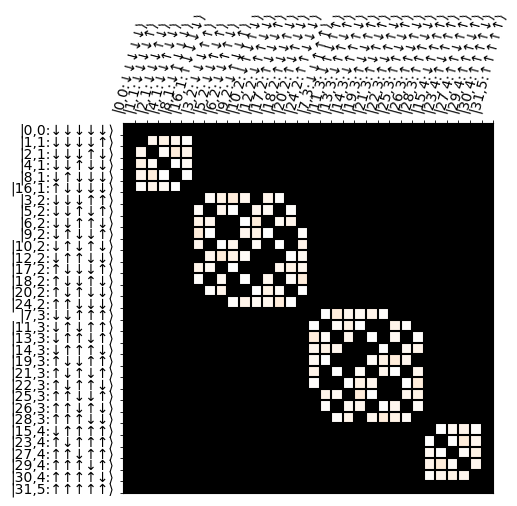

In [55]:
n_qbits = 5
n_interacting_pairs = 500
pairs = generate_random_pairs(n_interacting_pairs,n_qbits)
a = np.sum([S(p1,p2,n_qbits) for p1,p2 in pairs])


a.change_to_energy_basis()
a.plot()

In [57]:
n_qbits = 5
pairs = generate_all_pairs(n_qbits)
sets_of_pairs = powerset(pairs)
total = random_unitary.random_energy_preserving_unitary(n_qbits).data.nnz
for set_of_pairs in sets_of_pairs:
    if len(set_of_pairs)>0 and check_connected_pairs(set_of_pairs) and check_numbers_in_pairs(set_of_pairs,n_qbits):
        print(set_of_pairs)
        a = np.sum([S(p1,p2,n_qbits) for p1,p2 in set_of_pairs])
        a.change_to_energy_basis()
        
        u = DM.dm_exp(-.1j*a)
        sys = DM.n_thermal_qbits([random.random()/2.0 for _ in range(n_qbits)])
        sys.change_to_energy_basis()
        sys = u*sys*u.H
        sys = u*sys*u.H
        
       
        if sys.data.nnz<total:
            a.plot()
            sys.plot()

((0, 1), (0, 2), (0, 3), (0, 4))
((0, 1), (0, 2), (0, 3), (1, 4))
((0, 1), (0, 2), (0, 3), (2, 4))
((0, 1), (0, 2), (0, 3), (3, 4))
((0, 1), (0, 2), (0, 4), (1, 3))
((0, 1), (0, 2), (0, 4), (2, 3))
((0, 1), (0, 2), (0, 4), (3, 4))
((0, 1), (0, 2), (1, 3), (1, 4))
((0, 1), (0, 2), (1, 3), (2, 4))
((0, 1), (0, 2), (1, 3), (3, 4))
((0, 1), (0, 2), (1, 4), (2, 3))
((0, 1), (0, 2), (1, 4), (3, 4))
((0, 1), (0, 2), (2, 3), (2, 4))
((0, 1), (0, 2), (2, 3), (3, 4))
((0, 1), (0, 2), (2, 4), (3, 4))
((0, 1), (0, 3), (0, 4), (1, 2))
((0, 1), (0, 3), (0, 4), (2, 3))
((0, 1), (0, 3), (0, 4), (2, 4))
((0, 1), (0, 3), (1, 2), (1, 4))
((0, 1), (0, 3), (1, 2), (2, 4))
((0, 1), (0, 3), (1, 2), (3, 4))
((0, 1), (0, 3), (1, 4), (2, 3))
((0, 1), (0, 3), (1, 4), (2, 4))
((0, 1), (0, 3), (2, 3), (2, 4))
((0, 1), (0, 3), (2, 3), (3, 4))
((0, 1), (0, 3), (2, 4), (3, 4))
((0, 1), (0, 4), (1, 2), (1, 3))
((0, 1), (0, 4), (1, 2), (2, 3))
((0, 1), (0, 4), (1, 2), (3, 4))
((0, 1), (0, 4), (1, 3), (2, 3))
((0, 1), (